In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.linalg as la

from numpy.linalg import matrix_power


#### With consumption vector

In [2]:
## Log of real value added

n = 4
a = .1


# ## Unconstrained power law distribution
# S = round(np.power(10, pd.DataFrame(np.random.uniform(2, 4, (n, n)))), -2)
# c = round(np.power(10, pd.DataFrame(np.random.uniform(2, 4, (n, 1)))), -2)


### Schematic edge weights
S = pd.DataFrame(np.full((n, n), 100))
c = pd.DataFrame(np.full(n, 100))


### Different nw structures

In [3]:
# M is the adjacency matrix
Mi = np.eye(n)
Mo = np.roll(Mi, -n)
Mc = np.full((n, n), 1)
Ms = np.full((n, n), 0); Ms[0, 1:] = 1; Ms[1:, 0] = 1

Si = pd.DataFrame(Mi*S.values)
So = pd.DataFrame(Mo*S.mean().mean())
Sc = pd.DataFrame(Mc*S.values)
Ss = pd.DataFrame(Ms*S.mean().mean())


In [4]:
# s = 100
# c = 100
# ct = n*100
# n = 5
# s / ( (c + n*s) *(1 - s *(  n / (c + n*100) ) ) )

In [5]:
r = .1

for i, S in enumerate([Si, So, Sc, Ss]):
    print(['Isolated', 'Circular', 'Complete', 'Star'][i])
    
#     Scale Sales to have certain proportion of consumption.
    ratio = (S.sum().sum()/c.sum())[0]
    S = S * r/ratio
    
    stot = pd.DataFrame(S.sum(1)) + c
    R = S.T.div(stot.values).T ####( don't know if it should be trasposed)
    I = pd.DataFrame(np.eye(n))
    L = la.inv(I - R)
    
    display(S)
    display(pd.DataFrame(L).round(3))
    
    _1pct = .01*np.mean(c)[0] # one percent of mean consumption level.
    
    basis = _1pct*np.eye(n)
    for vector in basis:
        dc = pd.DataFrame(vector)
        dstot = L.dot(c + dc) - L.dot(c) # = L.dot(dc)
        print(sum(dstot))
    
    
    print('***')

Isolated


,0,1,2,3
0,10.0,0.0,0.0,0.0
1,0.0,10.0,0.0,0.0
2,0.0,0.0,10.0,0.0
3,0.0,0.0,0.0,10.0


,0,1,2,3
0,1.1,0.0,0.0,-0.0
1,0.0,1.1,0.0,-0.0
2,0.0,0.0,1.1,-0.0
3,0.0,0.0,0.0,1.1


[1.1]
[1.1]
[1.1]
[1.1]
***
Circular


,0,1,2,3
0,0.0,10.0,0.0,0.0
1,0.0,0.0,10.0,0.0
2,0.0,0.0,0.0,10.0
3,10.0,0.0,0.0,0.0


,0,1,2,3
0,1.000,0.091,0.008,0.001
1,0.001,1.000,0.091,0.008
2,0.008,0.001,1.000,0.091
3,0.091,0.008,0.001,1.000


[1.1]
[1.1]
[1.1]
[1.1]
***
Complete


,0,1,2,3
0,2.5,2.5,2.5,2.5
1,2.5,2.5,2.5,2.5
2,2.5,2.5,2.5,2.5
3,2.5,2.5,2.5,2.5


,0,1,2,3
0,1.025,0.025,0.025,0.025
1,0.025,1.025,0.025,0.025
2,0.025,0.025,1.025,0.025
3,0.025,0.025,0.025,1.025


[1.1]
[1.1]
[1.1]
[1.1]
***
Star


,0,1,2,3
0,0.000000,6.666667,6.666667,6.666667
1,6.666667,0.000000,0.000000,0.000000
2,6.666667,0.000000,0.000000,0.000000
3,6.666667,0.000000,0.000000,0.000000


,0,1,2,3
0,1.011,0.063,0.063,0.063
1,0.056,1.004,0.004,0.004
2,0.056,0.004,1.004,0.004
3,0.056,0.004,0.004,1.004


[1.17894737]
[1.07368421]
[1.07368421]
[1.07368421]
***


In [6]:
y = np.array([[11.46511628],[10.88372093],[10.88372093],[10.88372093],[10.88372093]]).flatten()  # IO dominant

x = np.array([[1.21428571], [1.07142857], [1.07142857], [1.07142857], [1.07142857]]).flatten() 
# Consumption dominant, star propagation is slightly more impactful.

In [7]:
y/x

array([ 9.4418605 , 10.15813955, 10.15813955, 10.15813955, 10.15813955])

### Matrix plot

In [9]:
import networkx as nx

## Log of real value added

n = 10
a = .1

### Schematic edge weights
S = pd.DataFrame(np.full((n, n), 100))
c = pd.DataFrame(np.full(n, 100))

# M is the adjacency matrix
Mi = np.eye(n)
Mo = np.roll(Mi, -n)
Mc = np.full((n, n), 1)
Ms = np.full((n, n), 0); Ms[0, 1:] = 1; Ms[1:, 0] = 1

# Si = pd.DataFrame(Mi*S.values)
# So = pd.DataFrame(Mo*S.mean().mean())
# Sc = pd.DataFrame(Mc*S.values)
# Ss = pd.DataFrame(Ms*S.mean().mean())


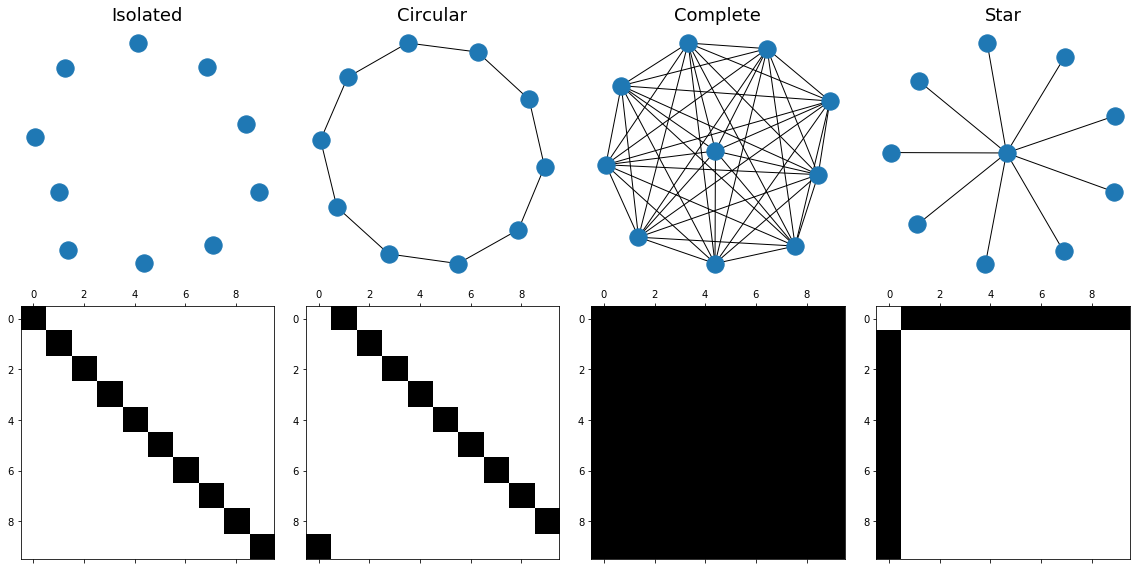

In [10]:
fig, axs = plt.subplots(2, 4, figsize = (16, 8))

for i, M in enumerate([Mi, Mo, Mc, Ms]):
    G = nx.from_numpy_matrix(M)
    axs[0, i].set_title(['Isolated', 'Circular', 'Complete', 'Star'][i], fontsize = 18)
    nx.draw(G, pos=nx.spring_layout(G), ax = axs[0, i])
    axs[1, i].matshow(M, cmap = 'Greys', vmin = 0, vmax = 1)
    
# plt.savefig('./../../../WRITING/paper1_writing/figures/network_plots.png')
plt.tight_layout()
plt.show()

In [15]:
n = 10
a = .1

### Schematic edge weights
S = pd.DataFrame(np.full((n, n), 100))
c = pd.DataFrame(np.full(n, 100))

# M is the adjacency matrix
Mi = np.eye(n)
Mo = np.roll(Mi, -n)
Mc = np.full((n, n), 1)
Ms = np.full((n, n), 0); Ms[0, 1:] = 1; Ms[1:, 0] = 1

Si = pd.DataFrame(Mi*S.values)
So = pd.DataFrame(Mo*S.mean().mean())
Sc = pd.DataFrame(Mc*S.values)
Ss = pd.DataFrame(Ms*S.mean().mean())


40.0
39.99999999999999
39.999999999999986
40.41367423154266


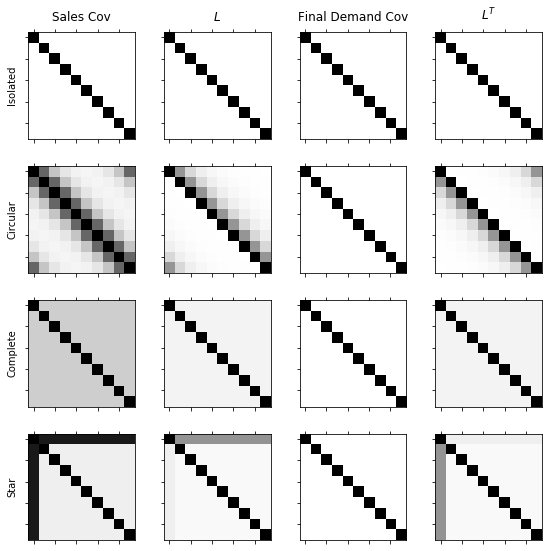

In [22]:

fig, axs = plt.subplots(4, 4, figsize = (8, 8))
r = 1

for i, S in enumerate([Si, So, Sc, Ss]):
#     Scale Sales to have certain proportion of consumption.
    ratio = (S.sum().sum()/c.sum())[0]
    S = S * r/ratio
    
    stot = pd.DataFrame(S.sum(1)) + c
    R = S.T.div(stot.values).T
    I = pd.DataFrame(np.eye(n))
    L = la.inv(I - R)
    
#     display(S)
#     display(L.round(3))
    
    _1pct = .01*np.mean(c)[0] # one percent of mean consumption level.
    
    basis = _1pct*np.eye(n)
    for vector in basis:
        dc = pd.DataFrame(vector)
        dstot = L.dot(c + dc) - L.dot(c) # = L.dot(dc)
#         print(sum(dstot))


    covC = np.eye(n)
    covS = L.dot(covC).dot(L.T)
    print(covS.sum())
    
    if i == 0: 
        for j in range(4):
            axs[i, j].set_title(['Sales Cov', r'$L$', 'Final Demand Cov', r'$L^{T}$'][j])
        
    axs[i, 0].matshow(covS, cmap = 'Greys', vmin = 0, vmax = 1)
    axs[i, 0].set_ylabel(['Isolated', 'Circular', 'Complete', 'Star'][i])
    axs[i, 1].matshow(L, cmap = 'Greys', vmin = 0, vmax = 1)
    axs[i, 2].matshow(covC, cmap = 'Greys', vmin = 0, vmax = 1)
    axs[i, 3].matshow(L.T, cmap = 'Greys', vmin = 0, vmax = 1)
    
    for j in range(4): axs[i, j].set_xticklabels([])
    for j in range(4): axs[i, j].set_yticklabels([])
        
# ax = axs[0, 0]
# ax.annotate('=', xy = (.27, .125), fontsize = 15, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('=', xy = (.27, .375), fontsize = 15, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('=', xy = (.27, .625), fontsize = 15, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('=', xy = (.27, .85), fontsize = 15, xycoords = 'figure fraction', ha = 'center', va = 'center')

# ax = axs[0, 0]
# ax.annotate('x', xy = (.515, .125), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.515, .375), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.515, .625), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.515, .85), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')

# ax = axs[0, 0]
# ax.annotate('x', xy = (.76, .125), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.76, .375), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.76, .625), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')
# ax.annotate('x', xy = (.76, .85), fontsize = 8, xycoords = 'figure fraction', ha = 'center', va = 'center')

plt.tight_layout(pad = 2)

plt.savefig('./../../../WRITING/paper1_writing/figures/demand_cov.png')

In [ ]:
xx

In [43]:
# L.dot(covC).dot(L.T)
# pd.DataFrame(L)

S_diag_star = Ss.copy()
for i in range(1, len(Ss)):
    S_diag_star.iloc[i, i] = (S_diag_star.sum()[0] - S_diag_star[0])[i]

S = S_diag_star

ratio = (S.sum().sum()/c.sum())[0]
S = S * r/ratio
    
stot = pd.DataFrame(S.sum(1)) + c
R = S.T.div(stot.values).T
I = pd.DataFrame(np.eye(n))
L = la.inv(I - R)

covC = np.eye(n)
covS = L.dot(covC).dot(L.T)

In [44]:
covS.sum()

40.0

In [ ]:
xx

In [ ]:

for i, S in enumerate([Si, So, Sc, Ss]):
#     Scale Sales to have certain proportion of consumption.
    ratio = (S.sum().sum()/c.sum())[0]
    S = S * r/ratio
    
    stot = pd.DataFrame(S.sum(1)) + c
    R = S.T.div(stot.values).T
    I = pd.DataFrame(np.eye(n))
    L = la.inv(I - R)
    
    

In [ ]:

sum([matrix_power(R, k) for k in range(5)])

In [ ]:
L

In [ ]:
## Log of real value added

n = 10
a = .1

S = round(np.power(10, pd.DataFrame(np.random.uniform(2, 4, (n, n)))), -2)

# # S.sum(1) # row sum
# # S.sum(0) # col sum
# S.div(S.sum(1), axis = 0) # row wise division. 
# S.div(S.sum(0), axis = 1) # col wise division

M = S.div(S.sum(0), axis = 1) # W
At = S.div(S.sum(1), axis  = 1)
A = S.T.div(S.sum(1), axis  = 0)
s = S.sum(1) #sales vector


In [ ]:
avals, avecs = la.eig(At)

In [ ]:
# # The kth power can be obtained from the diagonalized version as:

# k = 10;
# pd.DataFrame(np.round(np.dot(avecs, np.dot(np.diag(avals)**k, la.inv(avecs))), 2))

# # no me estaria funcionando... i.e. no ma da igual que np.round(np.power(At, 10), 5), porque esta ultime me hace los numeros al cuadrado...

In [ ]:
A
# (np.eye(n) - A)

In [ ]:
At_ = np.eye(n) + At + np.dot(At, At)

In [ ]:
round(np.eye(n) + At, 1)

In [ ]:
np.round(np.dot(At, At), 2)

In [ ]:
[k for k in range(2, 10)]

In [ ]:
pd.DataFrame(np.real(np.array([np.dot(avecs, np.dot(np.diag(avals)**k, la.inv(avecs))) for k in range(2, 4)]).sum(0)))

In [ ]:
avals, avecs = la.eig(At)
i = 0
plt.plot(np.real(np.dot(At,avecs)[:, i]), np.real(avecs[:,i]), marker = '.', lw = 0)

In [ ]:
avecs

In [ ]:
np.real(np.dot(At,avecs)[:, i]) #first col == first eigenvec


In [ ]:
At

In [ ]:
plt.plot(S.sum(1), np.array(np.real(avecs[:,i])), marker = '.', lw = 0)

In [ ]:
# avals, avecs = la.eig(M)

# i = 0
# # print(np.dot(W,avecs)[:, i])
# # print(avals[i]*avecs[:,i])
# # En gral
# # plt.plot(np.real(np.dot(W,avecs)[:, i]), np.real(avals[i]*avecs[:,i]), marker = '.', lw = 0)
# # El primer aval es 1
# plt.plot(np.real(np.dot(M,avecs)[:, i]), np.real(avecs[:,i]), marker = '.', lw = 0)

In [ ]:
Sgr = pd.DataFrame(S)
Sgr.index = pd.cut(Sgr.index, 10)
Sgr.columns = pd.cut(Sgr.columns, 10)

Sgr_ = Sgr.groupby(level = 0).sum().T
Sgr = Sgr_.groupby(level = 0).sum().T

Sgr = Sgr.values

In [ ]:
Sgr.sum(1)
Wgr = Sgr/Sgr.sum(0)


In [ ]:
avalsgr, avecsgr = la.eig(Wgr)
plt.plot(np.real(np.dot(Wgr,avecsgr)[:, i]), np.real(avecsgr[:,i]), marker = '.', lw = 0)

In [ ]:
# Vector (solucion estacionaria de ventas) (agrupadas)
sol = pd.Series(np.real(avecsgr[:,i]))
sol_gr = sol.copy()
sol_gr.index = pd.cut(sol.index, 10)
sol_gr = sol_gr.groupby(level = 0).sum()
sol_gr

In [ ]:
# Vector (solucion estacionaria) de (ventas agrupadas)
np.real(avecsgr[:,i])

In [ ]:
W.shape

In [ ]:
Wgr.shape

In [ ]:

Wgr2 = pd.DataFrame(W)
Wgr2.index = pd.cut(Wgr2.index, 10)
Wgr2.columns = pd.cut(Wgr2.columns, 10)

Wgr_ = Wgr2.groupby(level = 0).sum().T
Wgr2 = Wgr_.groupby(level = 0).sum().T
Wgr2 = pd.DataFrame(Wgr2.values/5)
Wgr2

In [ ]:
np.round(pd.DataFrame(Wgr) - Wgr2, 3)

In [ ]:
np.linalg.inv(np.eye(n) - (1 - a)*W.T)

In [ ]:

M = W

avals, avecs = la.eig(M)

avals = np.real(avals) # == np.abs(avals)
def component(k, avals = avals, avecs = avecs):
    uk = np.array(len(avals)*[avecs.T[k]]).reshape(avecs.shape) # la componente k agarra el elemento k de todos los autovectores.
    return np.real(avals[k]*np.multiply(uk.T, uk))

C_s = component(0) # structural component

In [ ]:
avals

In [ ]:
plt.matshow(np.linalg.inv(np.eye(n) - (1 - a)*W.T))

In [ ]:
np.linalg.inv(np.eye(n) - (1 - a)*W.T).sum(0)

In [ ]:
np.linalg.inv(np.eye(n) - (1 - a)*W.T).sum(0)